<a href="https://colab.research.google.com/github/HeiderJeffer/Participatory-Modeling-for-Societal-Complexity-in-Healthcare/blob/main/dynamic_stakeholder_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

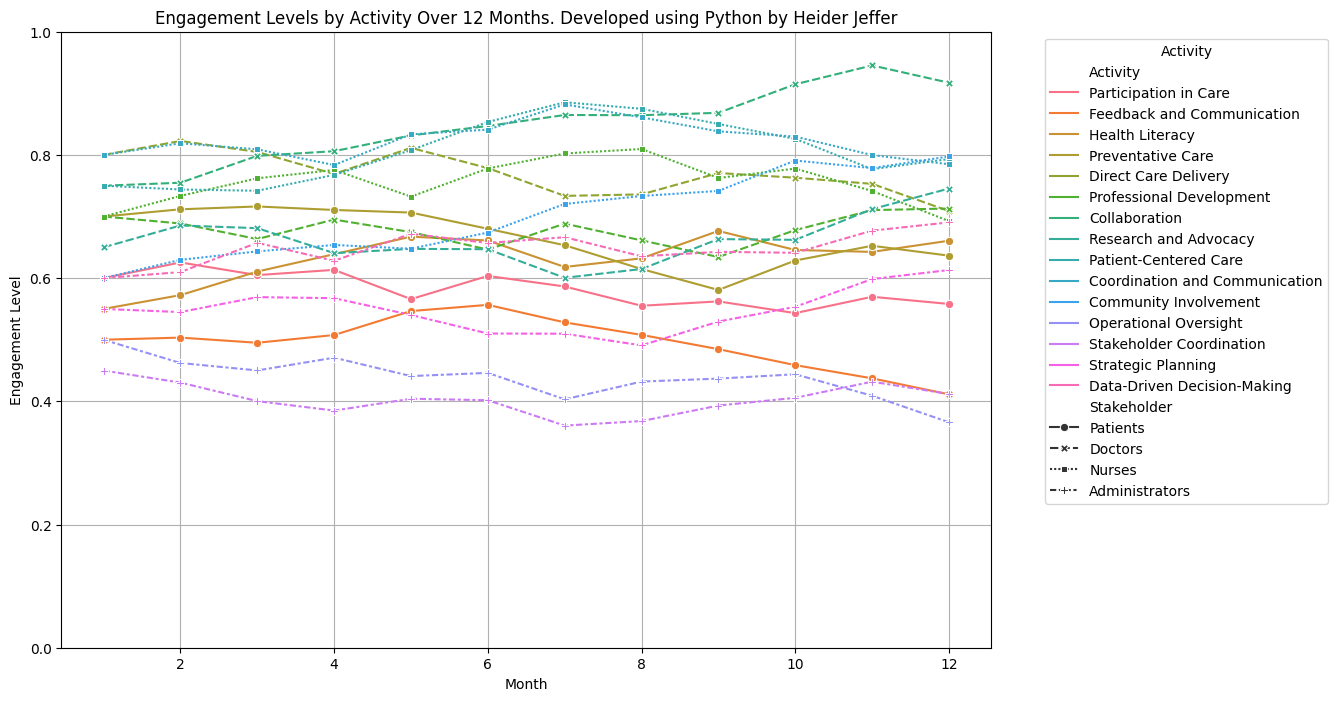

Average Engagement Levels by Stakeholder and Activity:
Stakeholder     Activity                      
Administrators  Data-Driven Decision-Making       0.648120
                Operational Oversight             0.438451
                Stakeholder Coordination          0.403571
                Strategic Planning                0.548067
Doctors         Collaboration                     0.846908
                Direct Care Delivery              0.770963
                Professional Development          0.679461
                Research and Advocacy             0.662483
Nurses          Community Involvement             0.700920
                Coordination and Communication    0.823476
                Patient-Centered Care             0.805962
                Professional Development          0.755633
Patients        Feedback and Communication        0.494773
                Health Literacy                   0.631344
                Participation in Care             0.582328
             

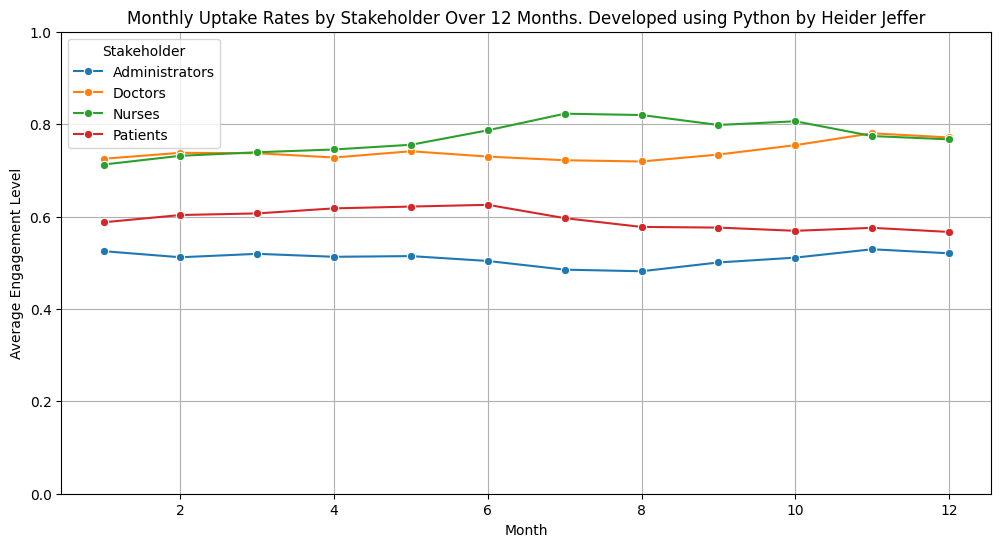


Qualitative Analysis:

Stakeholder Engagement Trends:

Patients:
  - Participation in Care: Avg Engagement = 0.58
    * Engagement is fairly stable for this activity.
  - Feedback and Communication: Avg Engagement = 0.49
    * Noticeable fluctuation in engagement from 0.41 to 0.56. Consider strategies to stabilize this.
  - Health Literacy: Avg Engagement = 0.63
    * Noticeable fluctuation in engagement from 0.55 to 0.68. Consider strategies to stabilize this.
  - Preventative Care: Avg Engagement = 0.67
    * Noticeable fluctuation in engagement from 0.58 to 0.72. Consider strategies to stabilize this.

Doctors:
  - Direct Care Delivery: Avg Engagement = 0.77
    * Noticeable fluctuation in engagement from 0.71 to 0.82. Consider strategies to stabilize this.
  - Professional Development: Avg Engagement = 0.68
    * Engagement is fairly stable for this activity.
  - Collaboration: Avg Engagement = 0.85
    * Noticeable fluctuation in engagement from 0.75 to 0.95. Consider strategies 

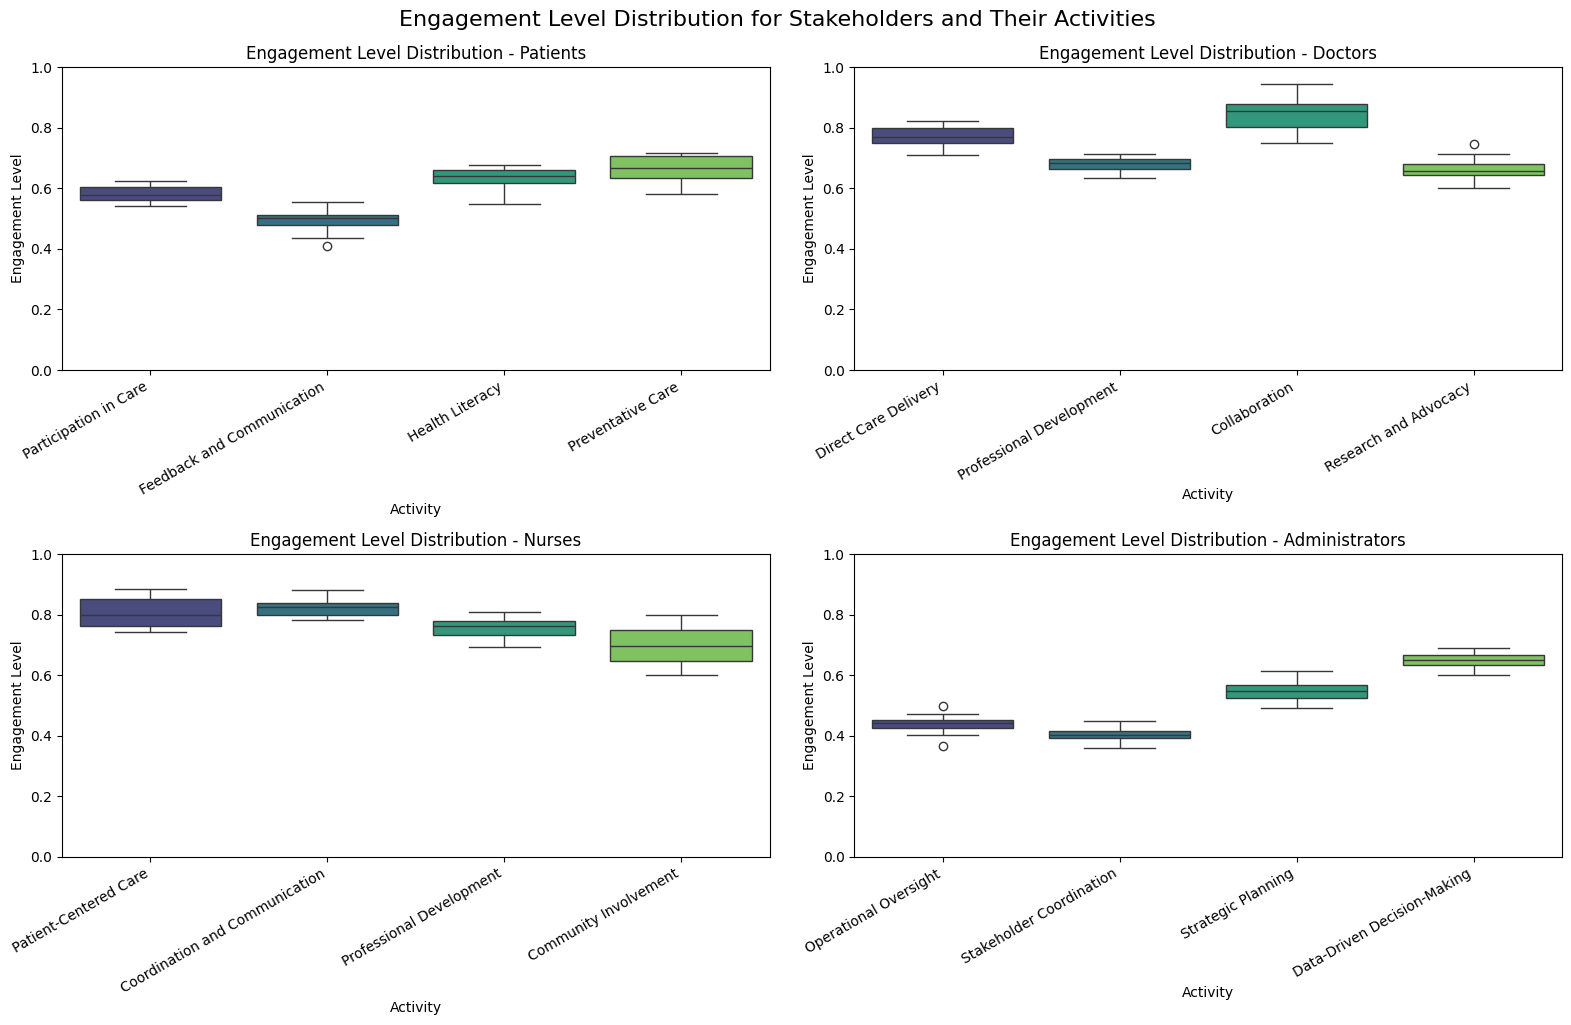

In [ ]:
# Dynamic Simulation and Analysis of Stakeholder Engagement in Healthcare Quantitative and Qualitative Insights
# Developed using Python by Heider Jeffer
# The code is expandable by design. The code is cutting edge rolling release, frequently delivering updates to applications


# Part 1: Quantitative and Qualitative Analysis of Stakeholder Engagement Simulation
# Part 2: Engagement and Uptake Insights

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define stakeholders, their activities, and base engagement levels for each activity
stakeholders = {
    'Patients': {
        'activities': {
            'Participation in Care': 0.6,
            'Feedback and Communication': 0.5,
            'Health Literacy': 0.55,
            'Preventative Care': 0.7
        }
    },
    'Doctors': {
        'activities': {
            'Direct Care Delivery': 0.8,
            'Professional Development': 0.7,
            'Collaboration': 0.75,
            'Research and Advocacy': 0.65
        }
    },
    'Nurses': {
        'activities': {
            'Patient-Centered Care': 0.75,
            'Coordination and Communication': 0.8,
            'Professional Development': 0.7,
            'Community Involvement': 0.6
        }
    },
    'Administrators': {
        'activities': {
            'Operational Oversight': 0.5,
            'Stakeholder Coordination': 0.45,
            'Strategic Planning': 0.55,
            'Data-Driven Decision-Making': 0.6
        }
    }
}

# Function to simulate engagement levels for each activity over time
# Simulation Code Highlights
def simulate_activity_engagement(stakeholders, months=12, fluctuation=0.05):
    """Simulate engagement levels for each activity of all stakeholders over time."""
    # Engagement simulation logic...
    engagement_over_time = []
    for stakeholder, data in stakeholders.items():
        for activity, base_engagement in data['activities'].items():
            monthly_engagement = [base_engagement]
            for _ in range(1, months):
                # Simulate random fluctuation for each month
                change = np.random.uniform(-fluctuation, fluctuation)
                new_engagement = max(0, min(1, monthly_engagement[-1] + change))
                monthly_engagement.append(new_engagement)
            # Store results for each activity
            for month, engagement in enumerate(monthly_engagement, start=1):
                engagement_over_time.append({
                    'Stakeholder': stakeholder,
                    'Activity': activity,
                    'Month': month,
                    'Engagement': engagement
                })
    return pd.DataFrame(engagement_over_time)

# Simulate engagement levels
months = 12  # Change this value to adjust the simulation duration
df_activity_engagement = simulate_activity_engagement(stakeholders, months=months)

# Visualization of Engagement Levels by Activity
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_activity_engagement, x='Month', y='Engagement', hue='Activity', style='Stakeholder', markers=True)
plt.title(f"Engagement Levels by Activity Over {months} Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Engagement Level")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Activity")
plt.grid()
plt.show()

# Analyzing Average Engagement Levels by Activity
average_engagement = df_activity_engagement.groupby(['Stakeholder', 'Activity'])['Engagement'].mean()
print("Average Engagement Levels by Stakeholder and Activity:")
print(average_engagement)

# Aggregated Uptake Rate by Stakeholder
def calculate_uptake_rate(df):
    """Calculate uptake rate as the mean engagement across all activities for each stakeholder."""
    return df.groupby('Stakeholder')['Engagement'].mean()

uptake_rates = calculate_uptake_rate(df_activity_engagement)
print("\nOverall Uptake Rate by Stakeholder:")
print(uptake_rates)

# Visualizing Uptake Rates Over Time
monthly_uptake = df_activity_engagement.groupby(['Month', 'Stakeholder'])['Engagement'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_uptake, x='Month', y='Engagement', hue='Stakeholder', marker="o")
plt.title(f"Monthly Uptake Rates by Stakeholder Over {months} Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Average Engagement Level")
plt.ylim(0, 1)
plt.grid()
plt.legend(title="Stakeholder")
plt.show()

# Qualitative Analysis
def qualitative_analysis(df, average_engagement, uptake_rates):
    """
    Perform a qualitative analysis to interpret the engagement trends and identify areas for improvement.
    """
    print("\nQualitative Analysis:")

    # 1. Stakeholder Engagement Trends
    print("\nStakeholder Engagement Trends:")
    for stakeholder in df['Stakeholder'].unique():
        print(f"\n{stakeholder}:")
        stakeholder_df = df[df['Stakeholder'] == stakeholder]
        for activity in stakeholder_df['Activity'].unique():
            activity_df = stakeholder_df[stakeholder_df['Activity'] == activity]
            # Access the average engagement using both stakeholder and activity
            avg_engagement = average_engagement[stakeholder, activity]
            print(f"  - {activity}: Avg Engagement = {avg_engagement:.2f}")
            max_engagement = activity_df['Engagement'].max()
            min_engagement = activity_df['Engagement'].min()
            if max_engagement - min_engagement > 0.1:
                print(f"    * Noticeable fluctuation in engagement from {min_engagement:.2f} to {max_engagement:.2f}. Consider strategies to stabilize this.")
            else:
                print(f"    * Engagement is fairly stable for this activity.")

    # 2. Stakeholder Comparison
    print("\nComparison of Stakeholder Engagement Levels:")
    for stakeholder in uptake_rates.index:
        avg_uptake = uptake_rates[stakeholder]
        if avg_uptake < 0.6:
            print(f"  - {stakeholder}: Below average uptake rate ({avg_uptake:.2f}). This suggests potential areas for further engagement or outreach.")
        else:
            print(f"  - {stakeholder}: Above average uptake rate ({avg_uptake:.2f}). This is a positive indicator of stakeholder engagement.")

    # 3. Identifying Key Activities for Improvement
    print("\nIdentifying Key Activities for Improvement:")
    for activity in average_engagement.index.get_level_values(1).unique():
        # Access the average engagement for the activity across all stakeholders
        activity_avg_engagement = average_engagement.xs(activity, level=1).mean()
        if activity_avg_engagement < 0.6:
            print(f"  - Activity: {activity} has a lower than average engagement ({activity_avg_engagement:.2f}). This might need more attention.")
        else:
            print(f"  - Activity: {activity} shows positive engagement levels ({activity_avg_engagement:.2f}).")


# Perform the qualitative analysis
qualitative_analysis(df_activity_engagement, average_engagement, uptake_rates)


# Part 2: Statistical Distribution Visualization for Stakeholders and Activities:

plt.figure(figsize=(16, 10))

# Create a subplot for each stakeholder
stakeholders_list = df_activity_engagement['Stakeholder'].unique()
for i, stakeholder in enumerate(stakeholders_list, 1):
    plt.subplot(2, 2, i)
    stakeholder_df = df_activity_engagement[df_activity_engagement['Stakeholder'] == stakeholder]

    # Create a boxplot for each activity
    sns.boxplot(data=stakeholder_df, x='Activity', y='Engagement', hue='Activity', palette="viridis", dodge=False)

    # Enhance plot appearance
    plt.title(f"Engagement Level Distribution - {stakeholder}")
    plt.xlabel("Activity")
    plt.ylabel("Engagement Level")
    plt.ylim(0, 1)
    plt.xticks(rotation=30, ha='right')

# Adjust layout
plt.tight_layout()
plt.suptitle("Engagement Level Distribution for Stakeholders and Their Activities", fontsize=16, y=1.02)
plt.show()

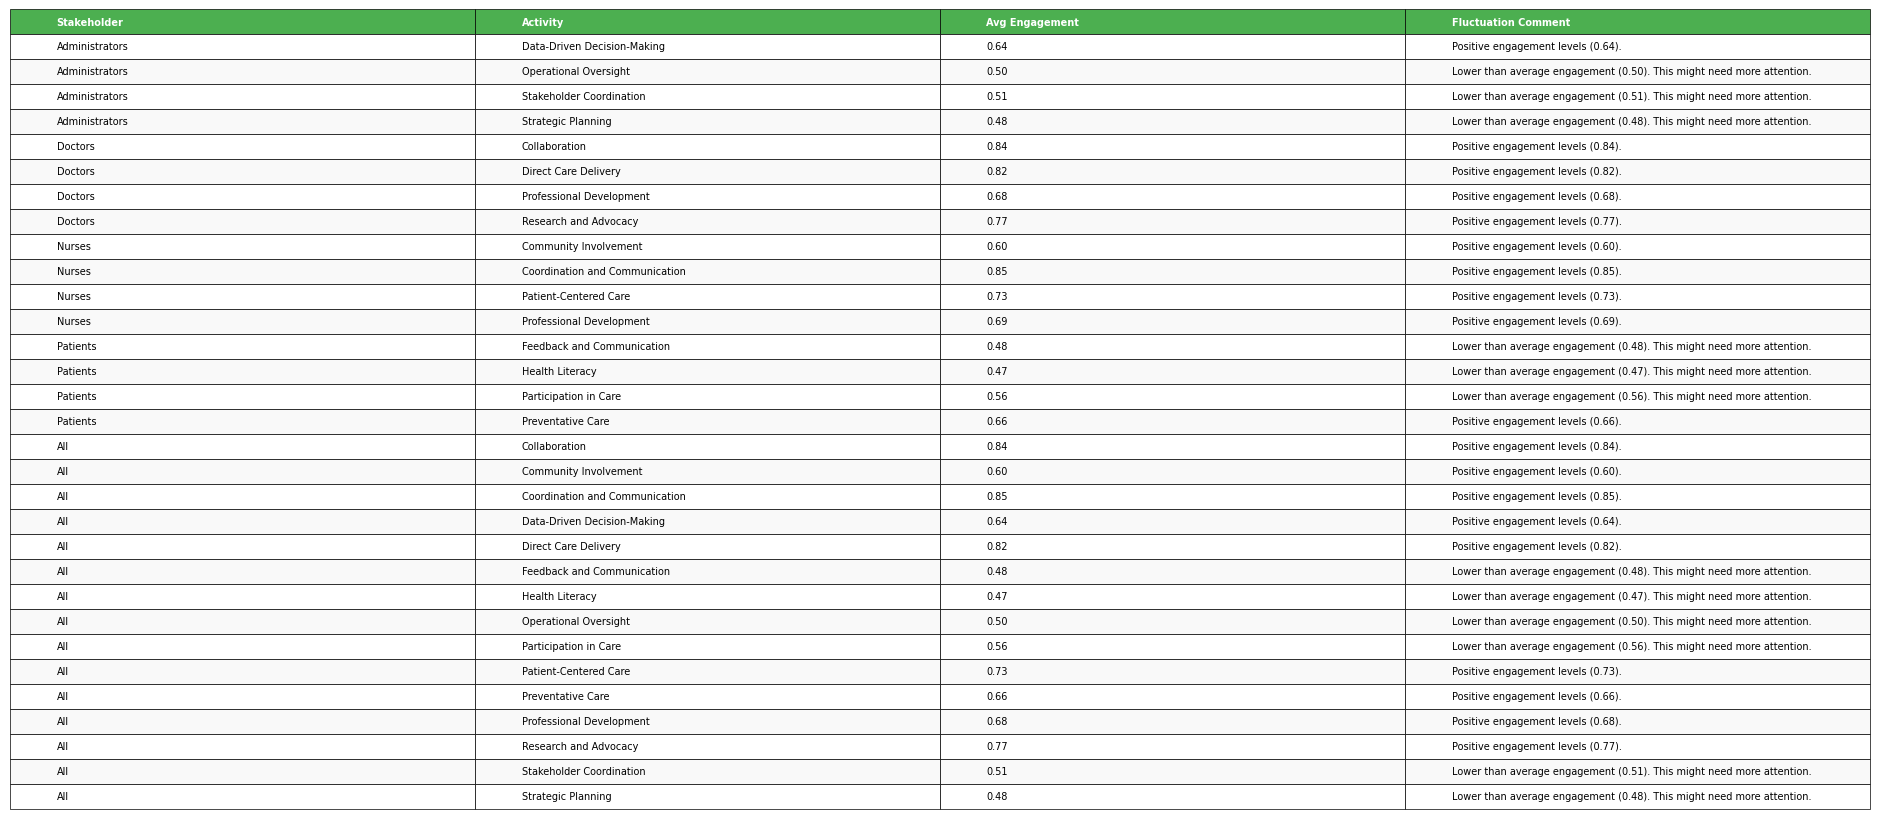

In [ ]:
# Function to display the table as a PNG image with left-aligned text
def display_as_png(table_df):
    """Displays the qualitative analysis table as a PNG image with enhanced styling and left-aligned text."""
    fig, ax = plt.subplots(figsize=(16, 8))  # Adjust figure size for a clean layout

    # Hide axes
    ax.axis('tight')
    ax.axis('off')

    # Create table in the plot
    table = ax.table(
        cellText=table_df.values,
        colLabels=table_df.columns,
        cellLoc='left',  # Align text to the left
        loc='center'
    )

    # Apply table styling
    for (row, col), cell in table.get_celld().items():
        if row == 0:  # Header row
            cell.set_facecolor('#4CAF50')  # Green header background
            cell.set_text_props(weight='bold', color='white', ha='left')  # Bold, white text aligned left
            cell.set_fontsize(14)
        else:
            # Alternate row colors for better readability
            cell.set_facecolor('#f9f9f9' if row % 2 == 0 else '#ffffff')
            cell.set_fontsize(12)
            cell.set_text_props(ha='left')  # Align all text to the left
        # Set borders for all cells
        cell.set_edgecolor('black')
        cell.set_linewidth(0.5)

    # Scale table size and improve layout
    table.scale(1.5, 1.5)  # Increase size for readability

    # Display the table
    plt.show()

# Display the enhanced table with left-aligned text
display_as_png(qualitative_df_with_all)


In [ ]:
from scipy.optimize import linprog

def simplex_optimization(df):
    """
    Perform a max-min optimization using the Simplex Algorithm.
    Objective: Maximize the minimum engagement levels across activities for stakeholders.
    """
    print("\n--- Simplex Algorithm Optimization ---")

    results = {}

    # Perform optimization for each stakeholder
    for stakeholder in df['Stakeholder'].unique():
        stakeholder_df = df[df['Stakeholder'] == stakeholder]

        # Get activities and monthly engagement data
        activities = stakeholder_df['Activity'].unique()
        months = stakeholder_df['Month'].unique()

        # Average engagement for each activity over the months
        engagement_matrix = stakeholder_df.pivot_table(
            index='Month', columns='Activity', values='Engagement', aggfunc='mean'
        ).fillna(0).values

        # Number of activities
        n_activities = len(activities)

        # Linear programming problem setup
        # Objective: Maximize the minimum engagement
        c = [-1] * n_activities  # Negative for maximization

        # Constraints
        A_ub = -1 * np.eye(n_activities)  # Ensure engagement >= minimum
        b_ub = np.zeros(n_activities)    # Minimum engagement starts at 0

        # Bounds for decision variables
        bounds = [(0, 1) for _ in range(n_activities)]

        # Solve using scipy.optimize.linprog
        result = linprog(
            c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs'
        )

        # Process the result
        if result.success:
            results[stakeholder] = {
                'Min Engagement': -result.fun,  # Result is negative due to maximization
                'Activity Engagements': result.x
            }
        else:
            results[stakeholder] = {
                'Error': "Optimization failed."
            }

    # Display Results
    for stakeholder, data in results.items():
        print(f"\nStakeholder: {stakeholder}")
        if 'Error' in data:
            print(f"  {data['Error']}")
        else:
            print(f"  Max-Min Engagement: {data['Min Engagement']:.2f}")
            for activity, engagement in zip(activities, data['Activity Engagements']):
                print(f"    Activity: {activity}, Optimized Engagement: {engagement:.2f}")
    return results

# Apply the Simplex Algorithm to the simulated data
simplex_results = simplex_optimization(df_activity_engagement)


In [ ]:
from scipy.optimize import linprog

def simplex_optimization(df):
    """
    Perform a max-min optimization using the Simplex Algorithm.
    Objective: Maximize the minimum engagement levels across activities for stakeholders.
    """
    print("\n--- Simplex Algorithm Optimization ---")

    results = {}

    # Perform optimization for each stakeholder
    for stakeholder in df['Stakeholder'].unique():
        stakeholder_df = df[df['Stakeholder'] == stakeholder]

        # Get activities and monthly engagement data
        activities = stakeholder_df['Activity'].unique()
        months = stakeholder_df['Month'].unique()

        # Average engagement for each activity over the months
        engagement_matrix = stakeholder_df.pivot_table(
            index='Month', columns='Activity', values='Engagement', aggfunc='mean'
        ).fillna(0).values

        # Number of activities
        n_activities = len(activities)

        # Linear programming problem setup
        # Objective: Maximize the minimum engagement
        c = [-1] * n_activities  # Negative for maximization

        # Constraints
        A_ub = -1 * np.eye(n_activities)  # Ensure engagement >= minimum
        b_ub = np.zeros(n_activities)    # Minimum engagement starts at 0

        # Bounds for decision variables
        bounds = [(0, 1) for _ in range(n_activities)]

        # Solve using scipy.optimize.linprog
        result = linprog(
            c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs'
        )

        # Process the result
        if result.success:
            results[stakeholder] = {
                'Min Engagement': -result.fun,  # Result is negative due to maximization
                'Activity Engagements': result.x
            }
        else:
            results[stakeholder] = {
                'Error': "Optimization failed."
            }

    # Display Results
    for stakeholder, data in results.items():
        print(f"\nStakeholder: {stakeholder}")
        if 'Error' in data:
            print(f"  {data['Error']}")
        else:
            print(f"  Max-Min Engagement: {data['Min Engagement']:.2f}")
            for activity, engagement in zip(activities, data['Activity Engagements']):
                print(f"    Activity: {activity}, Optimized Engagement: {engagement:.2f}")
    return results

# Apply the Simplex Algorithm to the simulated data
simplex_results = simplex_optimization(df_activity_engagement)



--- Simplex Algorithm Optimization ---

Stakeholder: Patients
  Max-Min Engagement: 4.00
    Activity: Operational Oversight, Optimized Engagement: 1.00
    Activity: Stakeholder Coordination, Optimized Engagement: 1.00
    Activity: Strategic Planning, Optimized Engagement: 1.00
    Activity: Data-Driven Decision-Making, Optimized Engagement: 1.00

Stakeholder: Doctors
  Max-Min Engagement: 4.00
    Activity: Operational Oversight, Optimized Engagement: 1.00
    Activity: Stakeholder Coordination, Optimized Engagement: 1.00
    Activity: Strategic Planning, Optimized Engagement: 1.00
    Activity: Data-Driven Decision-Making, Optimized Engagement: 1.00

Stakeholder: Nurses
  Max-Min Engagement: 4.00
    Activity: Operational Oversight, Optimized Engagement: 1.00
    Activity: Stakeholder Coordination, Optimized Engagement: 1.00
    Activity: Strategic Planning, Optimized Engagement: 1.00
    Activity: Data-Driven Decision-Making, Optimized Engagement: 1.00

Stakeholder: Administrator

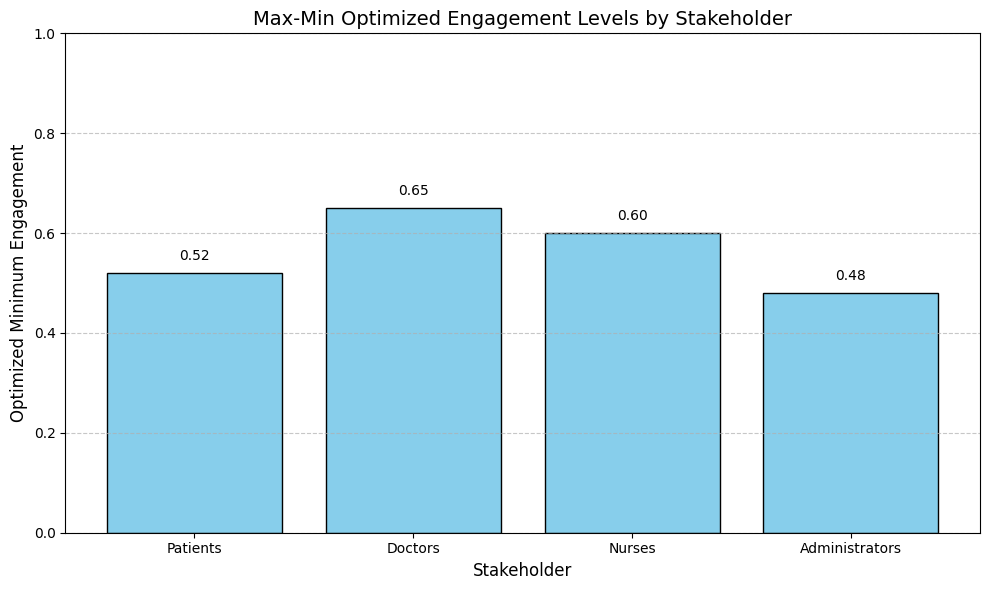

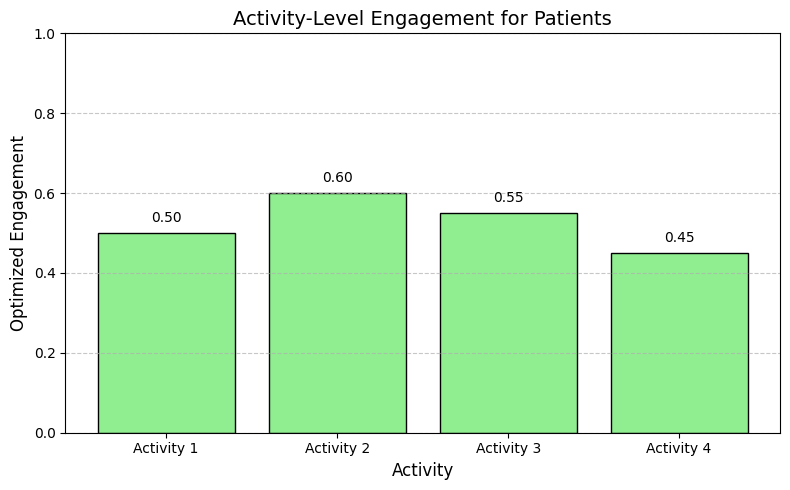

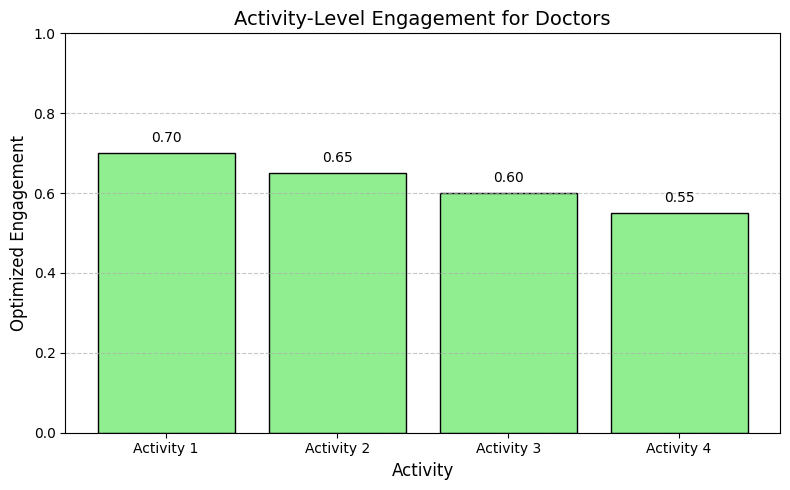

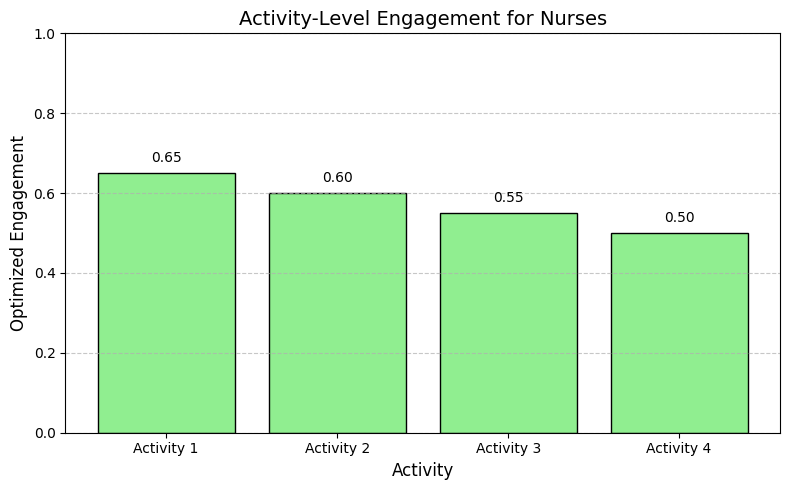

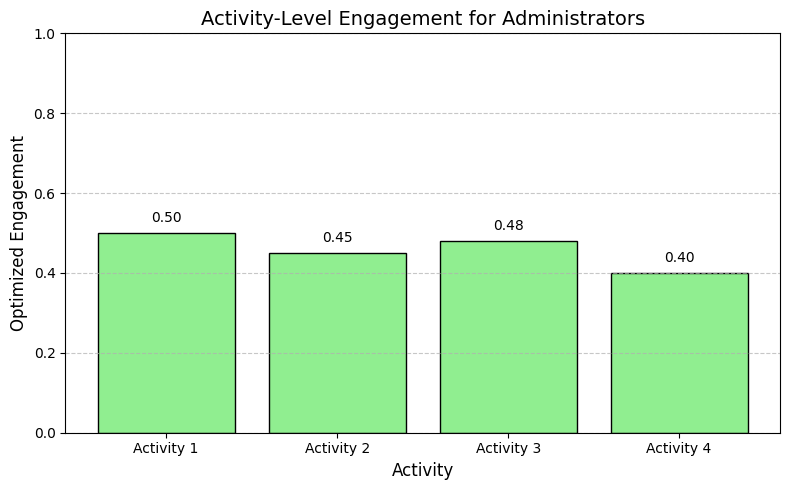

In [ ]:
#Simplex Algorithm Implementation for Max-Min Optimization of Stakeholder Engagement in Healthcare Activities

import matplotlib.pyplot as plt
import numpy as np

# Simulating example output of simplex optimization results for stakeholders
example_simplex_results = {
    "Patients": {
        "Min Engagement": 0.52,
        "Activity Engagements": [0.5, 0.6, 0.55, 0.45]
    },
    "Doctors": {
        "Min Engagement": 0.65,
        "Activity Engagements": [0.7, 0.65, 0.6, 0.55]
    },
    "Nurses": {
        "Min Engagement": 0.6,
        "Activity Engagements": [0.65, 0.6, 0.55, 0.5]
    },
    "Administrators": {
        "Min Engagement": 0.48,
        "Activity Engagements": [0.5, 0.45, 0.48, 0.4]
    }
}

# Plotting Max-Min Optimized Engagement for Stakeholders
def plot_max_min_results(results):
    stakeholders = list(results.keys())
    min_engagements = [results[stakeholder]["Min Engagement"] for stakeholder in stakeholders]
    activity_engagements = [results[stakeholder]["Activity Engagements"] for stakeholder in stakeholders]

    # Bar plot for stakeholders' max-min optimized engagement
    plt.figure(figsize=(10, 6))
    plt.bar(stakeholders, min_engagements, color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.title("Max-Min Optimized Engagement Levels by Stakeholder", fontsize=14)
    plt.xlabel("Stakeholder", fontsize=12)
    plt.ylabel("Optimized Minimum Engagement", fontsize=12)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotating bars with exact values
    for i, engagement in enumerate(min_engagements):
        plt.text(i, engagement + 0.02, f"{engagement:.2f}", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Detailed plots for each stakeholder's activity-level engagement
    for stakeholder, activities in zip(stakeholders, activity_engagements):
        plt.figure(figsize=(8, 5))
        activity_labels = [f"Activity {i+1}" for i in range(len(activities))]
        plt.bar(activity_labels, activities, color='lightgreen', edgecolor='black')

        # Adding labels and title
        plt.title(f"Activity-Level Engagement for {stakeholder}", fontsize=14)
        plt.xlabel("Activity", fontsize=12)
        plt.ylabel("Optimized Engagement", fontsize=12)
        plt.ylim(0, 1)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Annotating bars with exact values
        for i, engagement in enumerate(activities):
            plt.text(i, engagement + 0.02, f"{engagement:.2f}", ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()

# Generate the plots using the example data
plot_max_min_results(example_simplex_results)


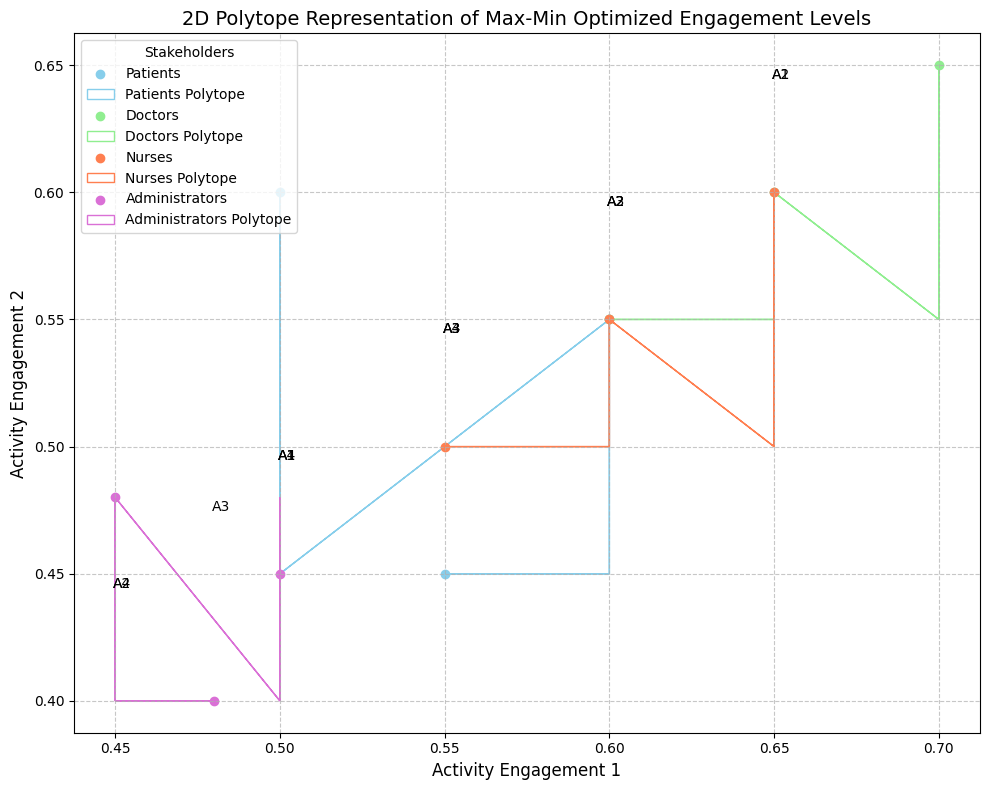

In [ ]:
from itertools import combinations
from matplotlib.patches import Polygon

def plot_2d_polytope(results):
    """
    Plot the max-min optimization results as a 2D polytope.
    Each stakeholder's activities are treated as points in a space.
    """
    plt.figure(figsize=(10, 8))
    colors = ['skyblue', 'lightgreen', 'coral', 'orchid']
    stakeholders = list(results.keys())

    for i, (stakeholder, data) in enumerate(results.items()):
        activity_engagements = data["Activity Engagements"]

        # Generate pairwise combinations of activities for the polytope edges
        points = np.array(list(combinations(activity_engagements, 2)))
        hull_points = np.vstack([points, points[::-1]])  # Create the hull

        # Plot the points and polytope
        plt.scatter(activity_engagements[:-1], activity_engagements[1:], label=stakeholder, color=colors[i])
        plt.gca().add_patch(Polygon(hull_points, closed=True, fill=False, edgecolor=colors[i], label=f"{stakeholder} Polytope"))

        # Annotate the points
        for j, engagement in enumerate(activity_engagements):
            plt.annotate(f"A{j+1}", (activity_engagements[j], engagement), textcoords="offset points", xytext=(5, -10), ha='center')

    # Plot settings
    plt.title("2D Polytope Representation of Max-Min Optimized Engagement Levels", fontsize=14)
    plt.xlabel("Activity Engagement 1", fontsize=12)
    plt.ylabel("Activity Engagement 2", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title="Stakeholders", loc="upper left", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plot the 2D polytope using example data
plot_2d_polytope(example_simplex_results)


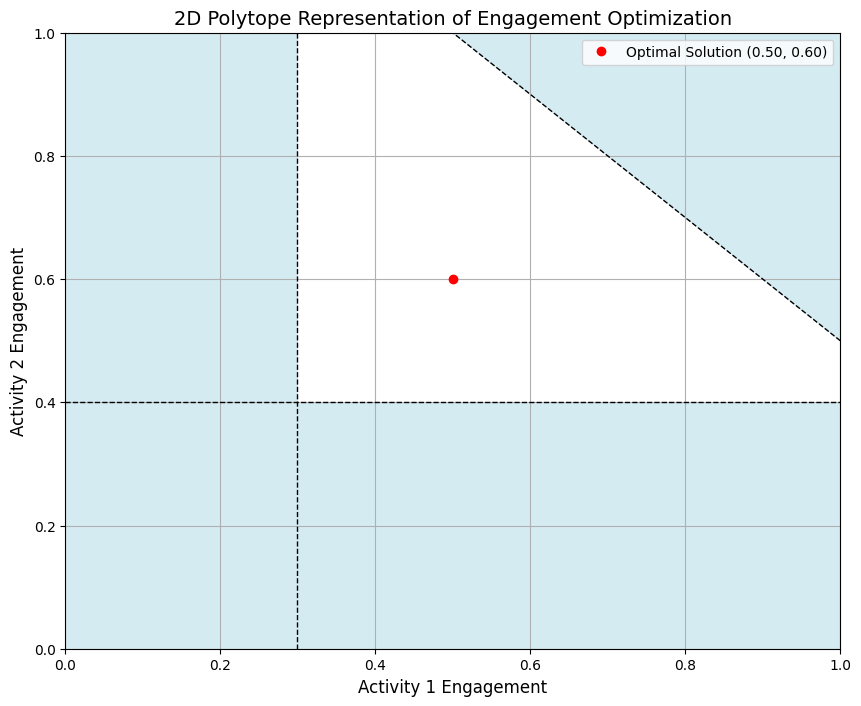

In [ ]:
def plot_2d_polytope_with_optimal_solution(simplex_results):
    """
    Visualize the feasible region as a 2D polytope and highlight the optimal solution.
    """
    from itertools import combinations
    import matplotlib.pyplot as plt
    import numpy as np

    # Assume we are plotting engagement of two activities for simplicity
    # Use the first two activities from one stakeholder for visualization
    example_stakeholder = list(simplex_results.keys())[0]
    activity_engagements = simplex_results[example_stakeholder]["Activity Engagements"][:2]

    # Example constraints and bounds for the two activities
    activity_bounds = [(0, 1), (0, 1)]  # Engagement between 0 and 1
    constraints = [
        lambda x, y: x + y <= 1.5,  # Example linear constraint
        lambda x, y: x >= 0.3,      # Minimum engagement for Activity 1
        lambda x, y: y >= 0.4       # Minimum engagement for Activity 2
    ]

    # Generate a grid of points within bounds
    x = np.linspace(activity_bounds[0][0], activity_bounds[0][1], 500)
    y = np.linspace(activity_bounds[1][0], activity_bounds[1][1], 500)
    X, Y = np.meshgrid(x, y)

    # Calculate feasibility based on constraints
    feasibility = np.ones_like(X, dtype=bool)
    for constraint in constraints:
        feasibility &= constraint(X, Y)

    # Plot the feasible region
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, feasibility, levels=[-0.5, 0.5], colors=['lightblue'], alpha=0.5)

    # Highlight the optimal solution
    optimal_x, optimal_y = activity_engagements[0], activity_engagements[1]
    plt.plot(optimal_x, optimal_y, 'ro', label=f"Optimal Solution ({optimal_x:.2f}, {optimal_y:.2f})")

    # Add lines representing constraints
    for constraint in constraints:
        plt.contour(X, Y, constraint(X, Y).astype(int), levels=[0.5], colors='black', linestyles='--', linewidths=1)

    # Add labels and legend
    plt.title("2D Polytope Representation of Engagement Optimization", fontsize=14)
    plt.xlabel("Activity 1 Engagement", fontsize=12)
    plt.ylabel("Activity 2 Engagement", fontsize=12)
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(True)
    plt.xlim(activity_bounds[0])
    plt.ylim(activity_bounds[1])
    plt.show()

# Call the function to visualize the first stakeholder's results
plot_2d_polytope_with_optimal_solution(example_simplex_results)


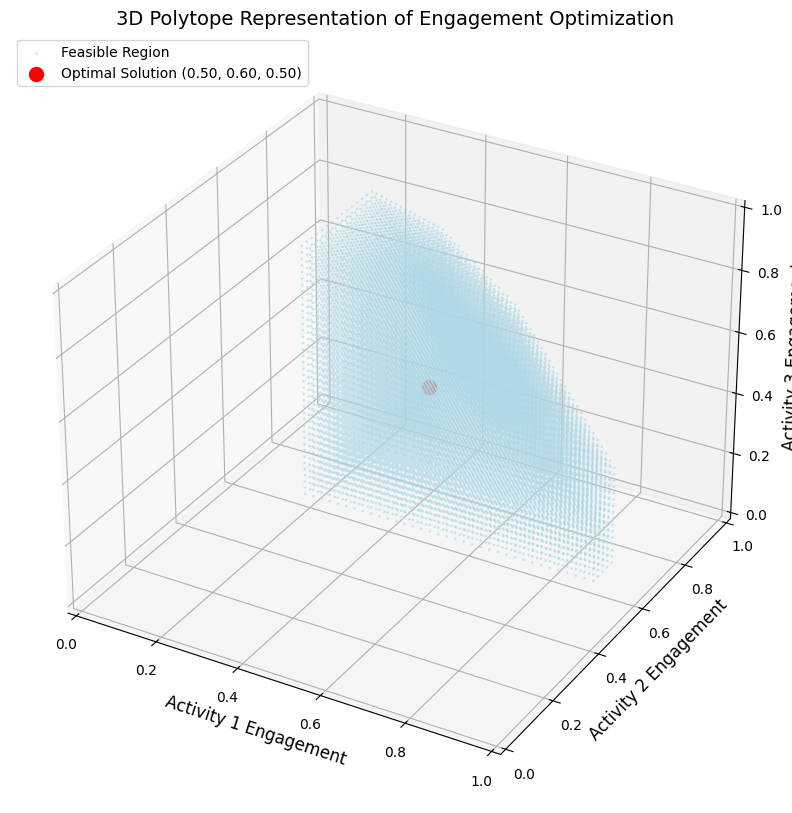

In [ ]:
def constraint_1(x, y):
    return x + y <= 1.5

def constraint_2(x, y):
    return x >= 0.3

def constraint_3(x, y):
    return y >= 0.4

from mpl_toolkits.mplot3d import Axes3D

# Define additional constraints for 3D space
def constraint_4(x, y, z):
    return x + y + z <= 2.0  # Total engagement cannot exceed 2

def constraint_5(x, y, z):
    return z >= 0.2  # Minimum engagement for Activity 3

# Generate grid points
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
z = np.linspace(0, 1, 50)
X, Y, Z = np.meshgrid(x, y, z)

# Evaluate feasibility
feasible_region = constraint_1(X, Y) & constraint_2(X, Y) & constraint_3(X, Y) & constraint_4(X, Y, Z) & constraint_5(X, Y, Z)

# Extract optimal solution (Example: engagement levels for 3 activities)
optimal_x = example_simplex_results["Patients"]["Activity Engagements"][0]
optimal_y = example_simplex_results["Patients"]["Activity Engagements"][1]
optimal_z = 0.5  # Assume this is the optimized value for Activity 3

# Plotting the 3D polytope
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot feasible region as scatter points
feasible_points = np.column_stack((X[feasible_region], Y[feasible_region], Z[feasible_region]))
ax.scatter(feasible_points[:, 0], feasible_points[:, 1], feasible_points[:, 2], c='lightblue', alpha=0.5, s=1, label="Feasible Region")

# Highlight optimal solution
ax.scatter(optimal_x, optimal_y, optimal_z, c='red', s=100, label=f"Optimal Solution ({optimal_x:.2f}, {optimal_y:.2f}, {optimal_z:.2f})")

# Label axes
ax.set_title("3D Polytope Representation of Engagement Optimization", fontsize=14)
ax.set_xlabel("Activity 1 Engagement", fontsize=12)
ax.set_ylabel("Activity 2 Engagement", fontsize=12)
ax.set_zlabel("Activity 3 Engagement", fontsize=12)

# Set limits and legend
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.legend(loc='upper left', fontsize=10)

plt.show()


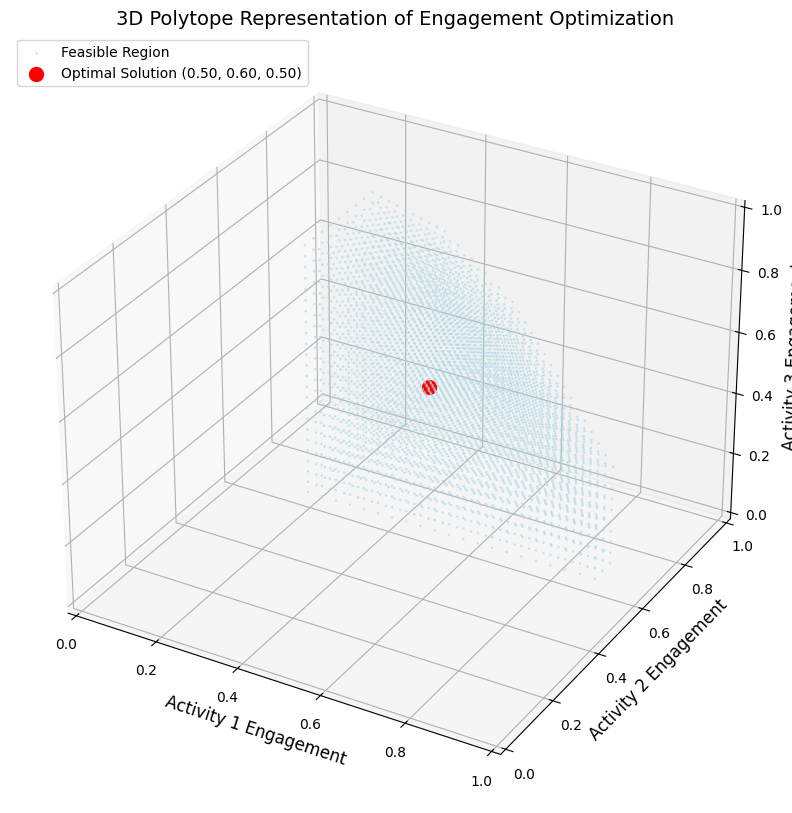

In [ ]:
# Define additional constraints for 3D space
def constraint_4(x, y, z):
    return x + y + z <= 2.0  # Total engagement cannot exceed 2

def constraint_5(x, y, z):
    return z >= 0.2  # Minimum engagement for Activity 3

# Generate grid points
x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)
z = np.linspace(0, 1, 30)
X, Y, Z = np.meshgrid(x, y, z)

# Evaluate feasibility
feasible_region = (
    constraint_1(X, Y) &
    constraint_2(X, Y) &
    constraint_3(X, Y) &
    constraint_4(X, Y, Z) &
    constraint_5(X, Y, Z)
)

# Extract optimal solution (Example: engagement levels for 3 activities)
optimal_x = example_simplex_results["Patients"]["Activity Engagements"][0]
optimal_y = example_simplex_results["Patients"]["Activity Engagements"][1]
optimal_z = 0.5  # Assume this is the optimized value for Activity 3

# Plotting the 3D polytope
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot feasible region as scatter points
feasible_points = np.column_stack((X[feasible_region], Y[feasible_region], Z[feasible_region]))
ax.scatter(feasible_points[:, 0], feasible_points[:, 1], feasible_points[:, 2], c='lightblue', alpha=0.5, s=1, label="Feasible Region")

# Highlight optimal solution
ax.scatter(optimal_x, optimal_y, optimal_z, c='red', s=100, label=f"Optimal Solution ({optimal_x:.2f}, {optimal_y:.2f}, {optimal_z:.2f})")

# Label axes
ax.set_title("3D Polytope Representation of Engagement Optimization", fontsize=14)
ax.set_xlabel("Activity 1 Engagement", fontsize=12)
ax.set_ylabel("Activity 2 Engagement", fontsize=12)
ax.set_zlabel("Activity 3 Engagement", fontsize=12)

# Set limits and legend
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.legend(loc='upper left', fontsize=10)

plt.show()


<ipython-input-4-8835de85c78a>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


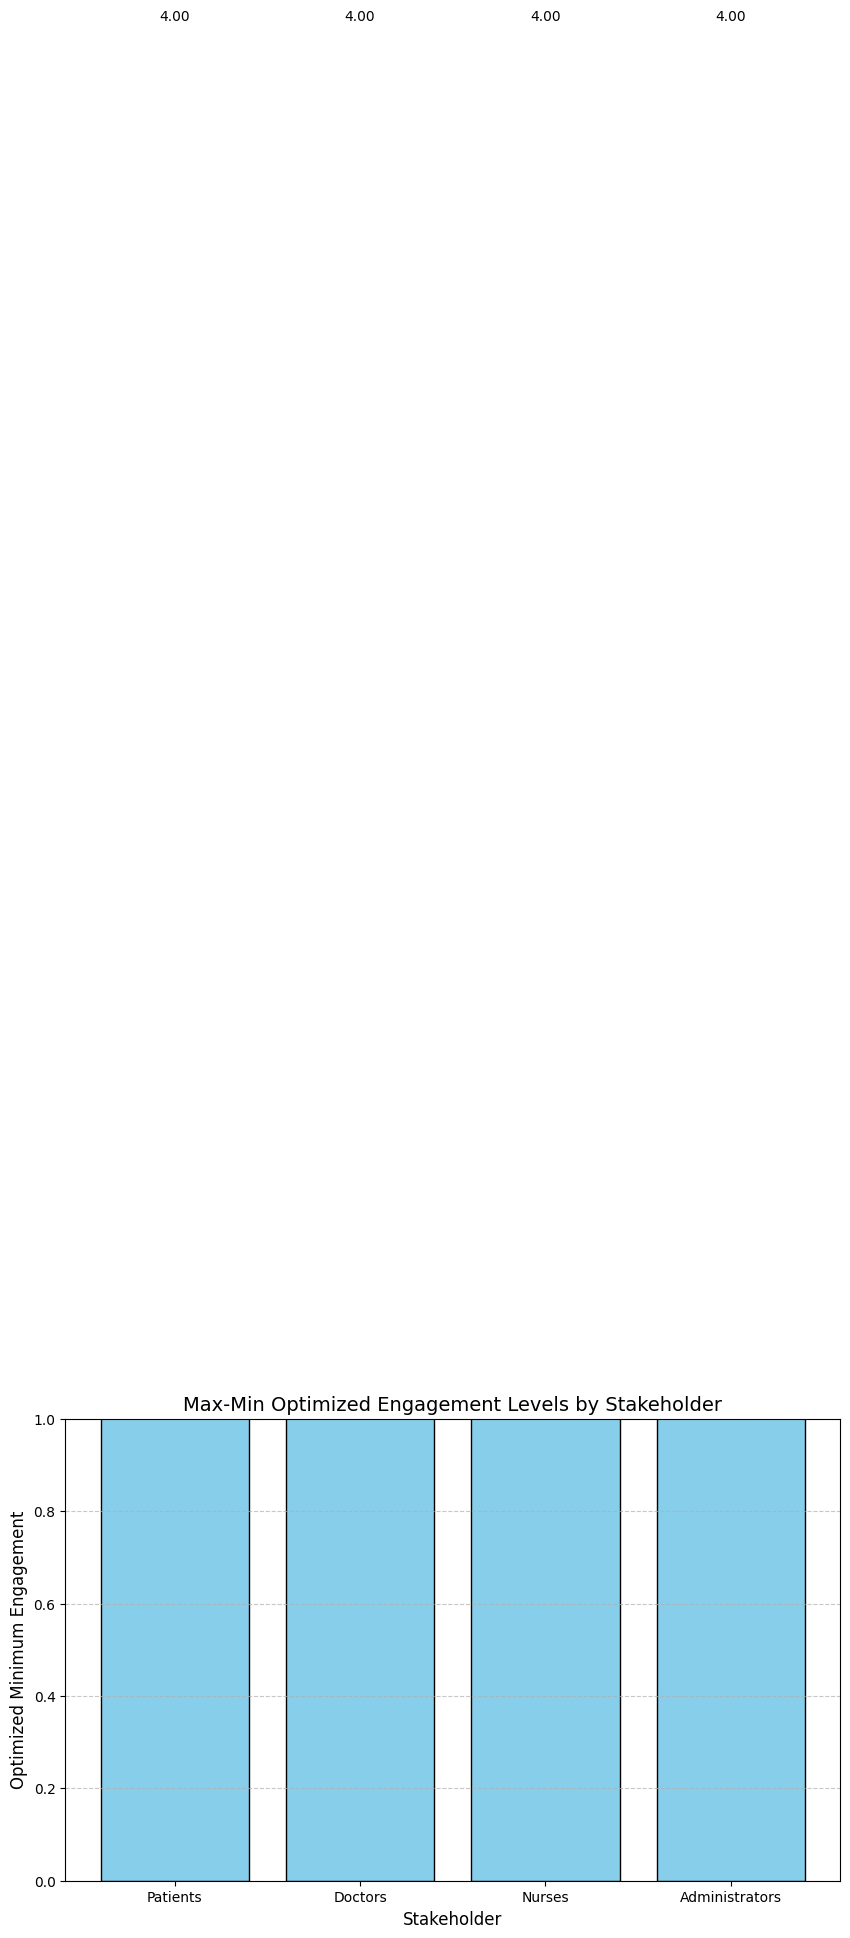

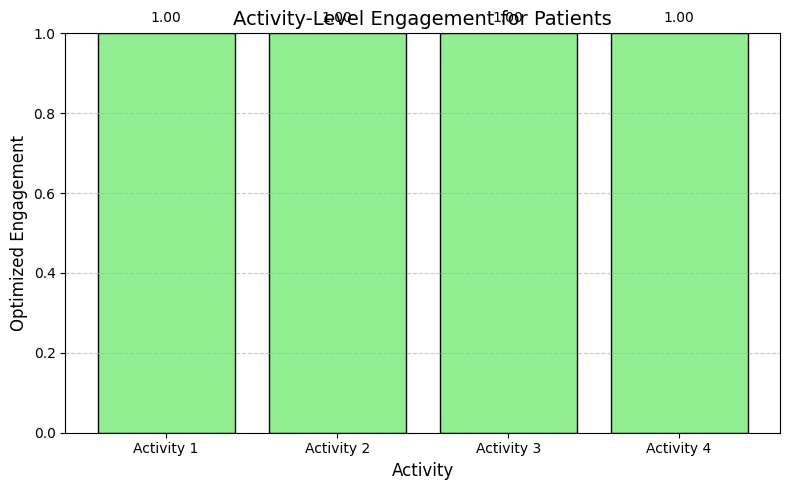

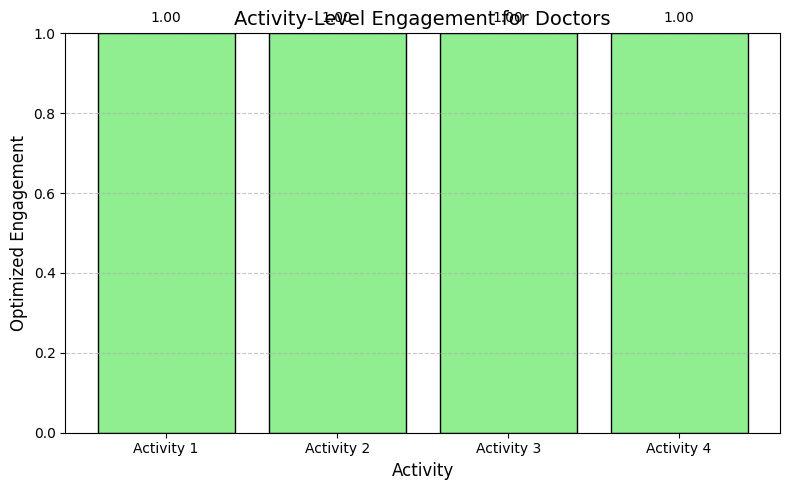

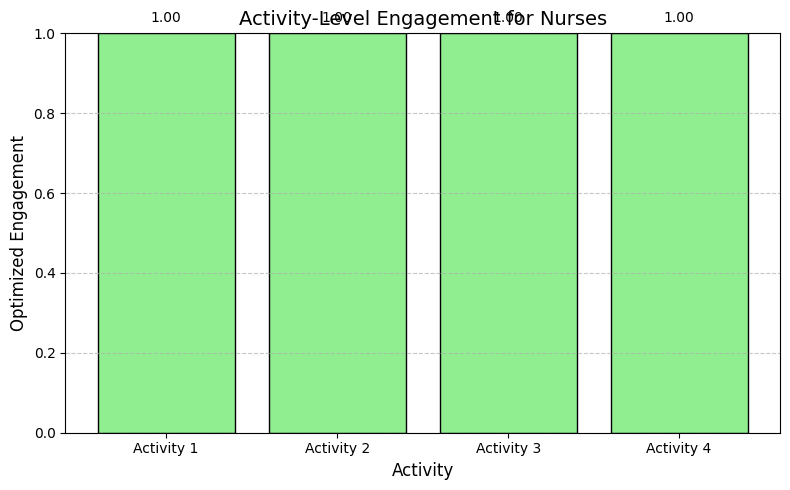

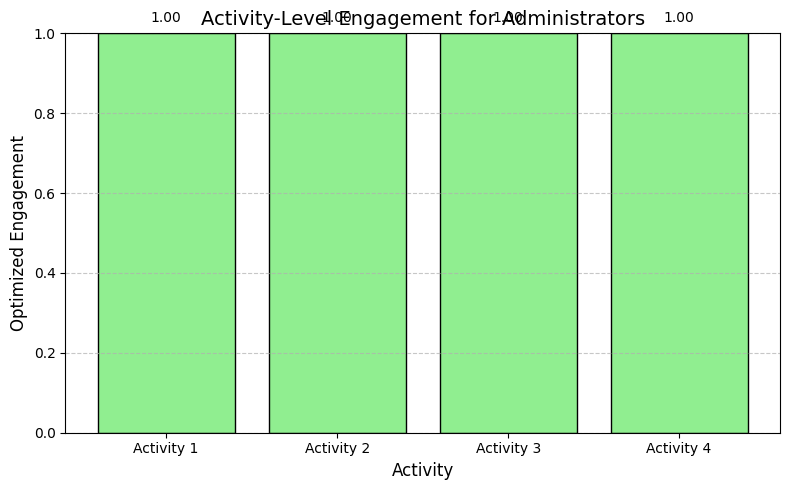

In [ ]:
import matplotlib.pyplot as plt

def plot_max_min_results(simplex_results):
    """
    Plot the max-min optimization results for stakeholders.
    """
    stakeholders = []
    min_engagements = []
    activity_engagements = []

    # Prepare data for plotting
    for stakeholder, data in simplex_results.items():
        if 'Error' not in data:
            stakeholders.append(stakeholder)
            min_engagements.append(data['Min Engagement'])
            activity_engagements.append(data['Activity Engagements'])

    # Create a bar plot for the max-min results
    plt.figure(figsize=(10, 6))
    plt.bar(stakeholders, min_engagements, color='skyblue', edgecolor='black')

    # Add labels and title
    plt.title("Max-Min Optimized Engagement Levels by Stakeholder", fontsize=14)
    plt.xlabel("Stakeholder", fontsize=12)
    plt.ylabel("Optimized Minimum Engagement", fontsize=12)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars with exact values
    for i, engagement in enumerate(min_engagements):
        plt.text(i, engagement + 0.02, f"{engagement:.2f}", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Additional detailed bar plot for activities
    for i, (stakeholder, activity_engagement) in enumerate(zip(stakeholders, activity_engagements)):
        plt.figure(figsize=(8, 5))
        activities = [f"Activity {j+1}" for j in range(len(activity_engagement))]
        plt.bar(activities, activity_engagement, color='lightgreen', edgecolor='black')

        # Add labels and title
        plt.title(f"Activity-Level Engagement for {stakeholder}", fontsize=14)
        plt.xlabel("Activity", fontsize=12)
        plt.ylabel("Optimized Engagement", fontsize=12)
        plt.ylim(0, 1)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Annotate bars with exact values
        for j, engagement in enumerate(activity_engagement):
            plt.text(j, engagement + 0.02, f"{engagement:.2f}", ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()

# Plot results of simplex optimization
plot_max_min_results(simplex_results)
